In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import copy
import joblib 
import warnings
warnings.filterwarnings("ignore")

In [2]:
diamond_df=pd.read_csv("train.csv")

In [3]:
diamond_df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [4]:
diamond_df=diamond_df.drop("id",axis=1)

In [5]:
diamond_df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [6]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 14.8+ MB


In [7]:
diamond_df.describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [8]:
diamond_df.cut.unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [9]:
diamond_df.color.unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [10]:
diamond_df.clarity.unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

<Axes: >

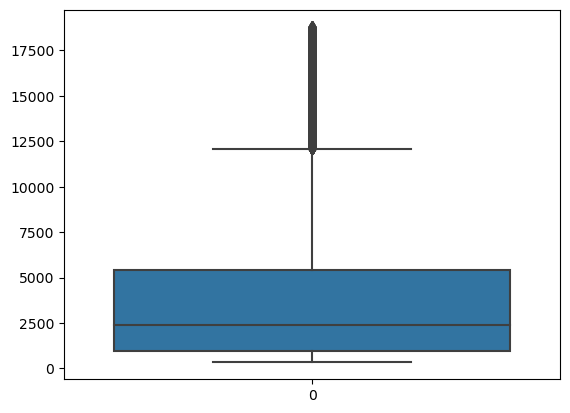

In [11]:
sns.boxplot(diamond_df.price)

In [12]:
def iqr_technique(DFcolumn):
    q1=np.percentile(DFcolumn,25)
    q3=np.percentile(DFcolumn,75)
    IQR=q3-q1
    lower_range=q1-(IQR*1.5)
    upper_range=q3+(IQR*1.5)
    return lower_range,upper_range

In [13]:
lower_bound,upper_bound=iqr_technique(diamond_df["price"])
diamond_df=diamond_df[(diamond_df.price>lower_bound) & (diamond_df.price<upper_bound)]

In [14]:
diamond_df

,carat,cut,color,clarity,depth,table,x,y,z,price
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
5,1.51,Very Good,J,SI1,62.8,58.0,7.34,7.29,4.59,7506
6,0.74,Ideal,E,VS2,61.8,57.0,5.76,5.79,3.57,3229
7,1.34,Premium,G,SI2,62.5,57.0,7.00,7.05,4.38,6224
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [15]:
diamond_df=diamond_df.reset_index()

In [16]:
diamond_df

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
1,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
2,5,1.51,Very Good,J,SI1,62.8,58.0,7.34,7.29,4.59,7506
3,6,0.74,Ideal,E,VS2,61.8,57.0,5.76,5.79,3.57,3229
4,7,1.34,Premium,G,SI2,62.5,57.0,7.00,7.05,4.38,6224
...,...,...,...,...,...,...,...,...,...,...,...
180919,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
180920,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
180921,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
180922,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [17]:
diamond_df=diamond_df.drop("index",axis=1)

In [18]:
diamond_df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
1,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
2,1.51,Very Good,J,SI1,62.8,58.0,7.34,7.29,4.59,7506
3,0.74,Ideal,E,VS2,61.8,57.0,5.76,5.79,3.57,3229
4,1.34,Premium,G,SI2,62.5,57.0,7.00,7.05,4.38,6224
...,...,...,...,...,...,...,...,...,...,...
180919,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
180920,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
180921,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
180922,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


<Axes: >

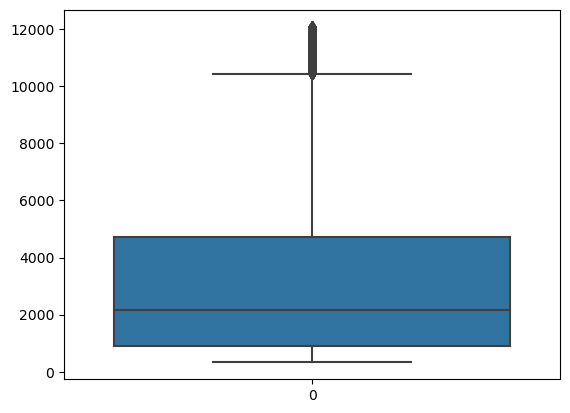

In [19]:
sns.boxplot(diamond_df.price)

In [20]:
carat_price=diamond_df.groupby("carat")["price"].mean().reset_index()

In [21]:
carat_price

,carat,price
0,0.20,368.000000
1,0.21,422.176471
2,0.22,459.333333
3,0.23,482.597300
4,0.24,495.954265
...,...,...
214,2.55,11233.000000
215,2.56,10428.000000
216,2.58,7027.000000
217,2.70,10940.000000


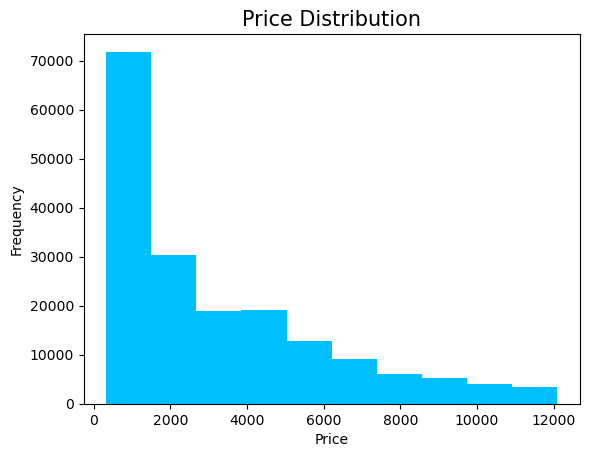

In [22]:
plt.hist(diamond_df.price,color="deepskyblue")
plt.title("Price Distribution",fontsize=15)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [23]:
cut_price=diamond_df.groupby("cut")["price"].mean().reset_index()

In [24]:
cut_price

,cut,price
0,Fair,3902.291712
1,Good,3582.627136
2,Ideal,2762.916856
3,Premium,3755.550750
4,Very Good,3369.490666


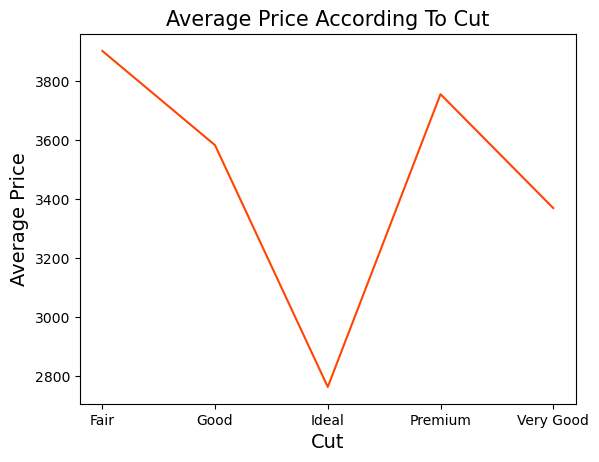

In [25]:
plt.plot(cut_price.cut,cut_price.price,color="orangered")
plt.title("Average Price According To Cut",fontsize=15)
plt.xlabel("Cut",fontsize=14)
plt.ylabel("Average Price",fontsize=14)
plt.show()

In [26]:
color_price=diamond_df.groupby("color")["price"].mean().reset_index()

In [27]:
color_price

,color,price
0,D,2626.786992
1,E,2541.227988
2,F,3091.042099
3,G,3308.811975
4,H,3783.308372
5,I,3999.453894
6,J,4128.083948


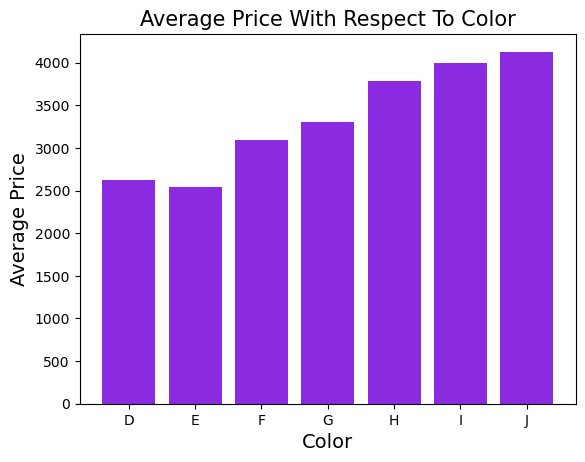

In [28]:
plt.bar(color_price["color"],color_price["price"],color="Blueviolet")
plt.title("Average Price With Respect To Color",fontsize=15)
plt.xlabel("Color",fontsize=14)
plt.ylabel("Average Price",fontsize=14)
plt.show()

In [29]:
clarity_price=diamond_df.groupby("clarity")["price"].mean().reset_index()

In [30]:
clarity_price

,clarity,price
0,I1,3397.571146
1,IF,1838.225697
2,SI1,3443.312414
3,SI2,3889.981858
4,VS1,3165.973471
5,VS2,3133.921243
6,VVS1,1830.027690
7,VVS2,2629.156132


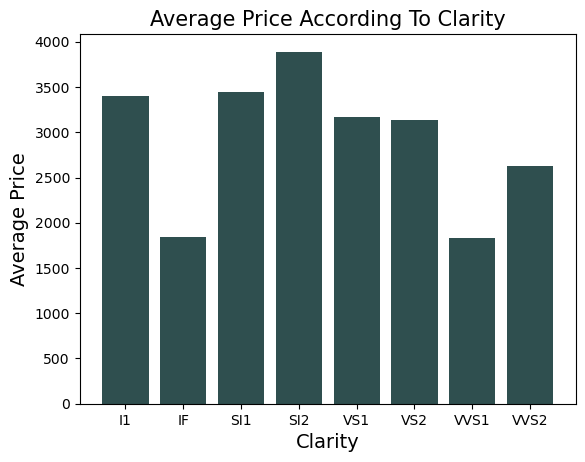

In [31]:
plt.bar(clarity_price["clarity"],clarity_price["price"],color="darkslategray")
plt.title("Average Price According To Clarity",fontsize=15)
plt.xlabel("Clarity",fontsize=14)
plt.ylabel("Average Price",fontsize=14)
plt.show()

In [32]:
l_enc=LabelEncoder()

In [33]:
l_cut=l_enc.fit_transform(diamond_df.cut)

In [34]:
l_cut

array([2, 2, 4, ..., 4, 4, 1])

In [35]:
l_color=l_enc.fit_transform(diamond_df.color)

In [36]:
l_color

array([3, 3, 6, ..., 2, 0, 1])

In [37]:
l_clarity=l_enc.fit_transform(diamond_df.clarity)

In [38]:
l_clarity

array([4, 4, 2, ..., 2, 2, 3])

In [39]:
diamond_df_ml=copy.deepcopy(diamond_df)

In [40]:
diamond_df_ml=diamond_df_ml.drop(["cut","color","clarity"],axis=1)

In [41]:
diamond_df_ml=diamond_df_ml.reset_index(drop=True)

In [42]:
diamond_df_ml

,carat,depth,table,x,y,z,price
0,0.70,61.2,57.0,5.69,5.73,3.50,2772
1,0.32,61.6,56.0,4.38,4.41,2.71,666
2,1.51,62.8,58.0,7.34,7.29,4.59,7506
3,0.74,61.8,57.0,5.76,5.79,3.57,3229
4,1.34,62.5,57.0,7.00,7.05,4.38,6224
...,...,...,...,...,...,...,...
180919,0.31,61.1,56.0,4.35,4.39,2.67,1130
180920,0.70,60.3,58.0,5.75,5.77,3.47,2874
180921,0.73,63.1,57.0,5.72,5.75,3.62,3036
180922,0.34,62.9,55.0,4.45,4.49,2.81,681


In [43]:
diamond_df_ml["l_cut"]=l_cut

In [44]:
diamond_df_ml["l_color"]=l_color

In [45]:
diamond_df_ml["l_clarity"]=l_clarity

In [46]:
diamond_df_ml

,carat,depth,table,x,y,z,price,l_cut,l_color,l_clarity
0,0.70,61.2,57.0,5.69,5.73,3.50,2772,2,3,4
1,0.32,61.6,56.0,4.38,4.41,2.71,666,2,3,4
2,1.51,62.8,58.0,7.34,7.29,4.59,7506,4,6,2
3,0.74,61.8,57.0,5.76,5.79,3.57,3229,2,1,5
4,1.34,62.5,57.0,7.00,7.05,4.38,6224,3,3,3
...,...,...,...,...,...,...,...,...,...,...
180919,0.31,61.1,56.0,4.35,4.39,2.67,1130,2,0,7
180920,0.70,60.3,58.0,5.75,5.77,3.47,2874,3,3,7
180921,0.73,63.1,57.0,5.72,5.75,3.62,3036,4,2,2
180922,0.34,62.9,55.0,4.45,4.49,2.81,681,4,0,2


In [47]:
x=diamond_df_ml.drop("price",axis=1)

In [48]:
x

,carat,depth,table,x,y,z,l_cut,l_color,l_clarity
0,0.70,61.2,57.0,5.69,5.73,3.50,2,3,4
1,0.32,61.6,56.0,4.38,4.41,2.71,2,3,4
2,1.51,62.8,58.0,7.34,7.29,4.59,4,6,2
3,0.74,61.8,57.0,5.76,5.79,3.57,2,1,5
4,1.34,62.5,57.0,7.00,7.05,4.38,3,3,3
...,...,...,...,...,...,...,...,...,...
180919,0.31,61.1,56.0,4.35,4.39,2.67,2,0,7
180920,0.70,60.3,58.0,5.75,5.77,3.47,3,3,7
180921,0.73,63.1,57.0,5.72,5.75,3.62,4,2,2
180922,0.34,62.9,55.0,4.45,4.49,2.81,4,0,2


In [49]:
y=diamond_df_ml["price"]

In [50]:
y

0         2772
1          666
2         7506
3         3229
4         6224
          ... 
180919    1130
180920    2874
180921    3036
180922     681
180923    2258
Name: price, Length: 180924, dtype: int64

In [51]:
sca=StandardScaler()

In [52]:
sca_x=sca.fit_transform(x)

In [53]:
sca_x

array([[-0.04326421, -0.58227783, -0.09743722, ..., -0.61524447,
         0.33567187,  0.10190666],
       [-1.06441972, -0.21001441, -0.61974832, ..., -0.61524447,
         0.33567187,  0.10190666],
       [ 2.1334094 ,  0.90677583,  0.42487389, ...,  1.59695786,
         2.20022855, -1.11147675],
       ...,
       [ 0.03735333,  1.18597339, -0.09743722, ...,  1.59695786,
        -0.28584703, -1.11147675],
       [-1.0106747 ,  0.99984168, -1.14205943, ...,  1.59695786,
        -1.52888481, -1.11147675],
       [-0.01639169, -0.95454124,  3.55874052, ..., -1.72134563,
        -0.90736592, -0.50478504]])

In [54]:
sca_xtrain,sca_xtest,ytrain,ytest=train_test_split(sca_x,y,test_size=0.2)

In [59]:
Reg_model={
    "linear_regression_model": LinearRegression(),
    "decision_tree_regressor_model": DecisionTreeRegressor(),
    "svc_model": SVR(),
    "random_forest_regressor_model": RandomForestRegressor()
}

In [60]:
scores=[]

In [62]:
for i in Reg_model:
    mp=Reg_model[i]
    mp.fit(sca_xtrain,ytrain)
    scores.append({i:mp.score(sca_xtest,ytest)})

In [63]:
scores

[{'linear_regression_model': 0.9060321251697041},
 {'decision_tree_regressor_model': 0.9565114456666081},
 {'svc_model': 0.8322107945435234},
 {'random_forest_regressor_model': 0.9770401328651724}]

In [64]:
final_model_rfg=RandomForestRegressor().fit(sca_xtrain,ytrain)

In [65]:
final_model_rfg.score(sca_xtest,ytest)

0.9768894661797392

In [67]:
joblib.dump(final_model_rfg,"Diamond_Prediction_Model")

['Diamond_Prediction_Model']